In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Загрузка данных 

In [2]:
data = pd.read_csv('D://Проект майнор/student-por.csv', sep = ';')


In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# 1. Знакомство с данными

Объектом в задаче является ученик. Объект задается признаковым описанием.


In [474]:
print('Кол-во признаков:',len(data.columns))

Кол-во признаков: 33


In [475]:
print(len(data))
data = data.dropna()
print(len(data))

649
649


Итог: пропусков в данных не было.

In [476]:
# изучив признаки, их можно классифицировать программно, чтобы потом не искать еще раз числовые признаки для след заданий
features = [(x) for x in data.columns]
b = []
v=[]
l = {i for i in range(1,6)}
l1 = {i for i in range(5)}
l2 = {i for i in range(1,5)}
for x in features:
    b.append(set(data[x]))
d = {x:set(data[x]) for x in data.columns}
for i in range(len(b)):
    if len(b[i])==2:
        print(features[i],' - бинарный признак, множество значений = ', b[i],
              'состоит из двух элементов, можно привести к виду {0, 1}')
        v.append(0)
    elif b[i]==l or b[i] == l1 or b[i] ==l2:
        print(features[i],' - категориальный признак, множество значений:', b[i],
              ', где число означает принадлженость к категории')
        v.append(2)
    else:
        for elem in b[i]:                
            if str(elem).isdigit():
                print(features[i],' - числовой признак, так как множество значений =', b[i])
                v.append(1)
            else:
                print(features[i],' - категориальный признак, множество значений:', b[i])
                v.append(2)
            break

school  - бинарный признак, множество значений =  {'MS', 'GP'} состоит из двух элементов, можно привести к виду {0, 1}
sex  - бинарный признак, множество значений =  {'M', 'F'} состоит из двух элементов, можно привести к виду {0, 1}
age  - числовой признак, так как множество значений = {15, 16, 17, 18, 19, 20, 21, 22}
address  - бинарный признак, множество значений =  {'R', 'U'} состоит из двух элементов, можно привести к виду {0, 1}
famsize  - бинарный признак, множество значений =  {'LE3', 'GT3'} состоит из двух элементов, можно привести к виду {0, 1}
Pstatus  - бинарный признак, множество значений =  {'A', 'T'} состоит из двух элементов, можно привести к виду {0, 1}
Medu  - категориальный признак, множество значений: {0, 1, 2, 3, 4} , где число означает принадлженость к категории
Fedu  - категориальный признак, множество значений: {0, 1, 2, 3, 4} , где число означает принадлженость к категории
Mjob  - категориальный признак, множество значений: {'services', 'other', 'at_home', 'teac


# 2. Целевой признак

Данная задача (предсказание оценки по предмету) может быть решена регрессией, так как можно получать вещественные значения из отрезка от 0 до 20 и округлять их до целого. Так как ответов в данной задаче конечное число, то данную задачу можно рассмотреть как многоклассовую классификацию, где каждый класс  - это оценка, которую получит ученик. 
Я считаю, что для данной задачи лучше использовать классификацию, так как признаков достаточно много, что может затруднить решение задачи регрессией. 

Самое частое значение:  [11]
Средний балл:  11.906009244992296
Нет студентов, ролучивших 20
Есть студенты, получившие 0


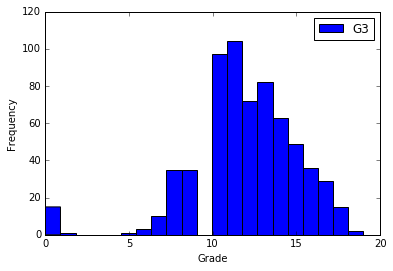

In [477]:
data['G3'].plot(kind = 'hist', bins = 21)
plt.xlabel('Grade')
plt.legend()
print('Самое частое значение: ',stats.mode(data['G3'])[0])
print('Средний балл: ', data['G3'].mean())
if data['G3'].max()==20:
    print('Есть студенты, получившие 20')
else:
    print('Нет студентов, ролучивших 20')
if data['G3'].min()==0:
    print('Есть студенты, получившие 0')
else:
    print('Нет студентов, ролучивших 0')

Самое частое значение:  [11]
Средний балл:  11.570107858243452
Нет студентов, ролучивших 20
Есть студенты, получившие 0


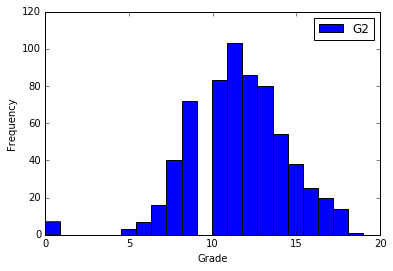

In [478]:
data['G2'].plot(kind = 'hist', bins = 21)
plt.xlabel('Grade')
plt.legend()
print('Самое частое значение: ',stats.mode(data['G2'])[0])
print('Средний балл: ', data['G2']. mean())
if data['G2'].max()==20:
    print('Есть студенты, получившие 20')
else:
    print('Нет студентов, ролучивших 20')
if data['G2'].min()==0:
    print('Есть студенты, получившие 0')
else:
    print('Нет студентов, ролучивших 0')

Самое частое значение:  [10]
Средний балл:  11.399075500770415
Нет студентов, ролучивших 20
Есть студенты, получившие 0


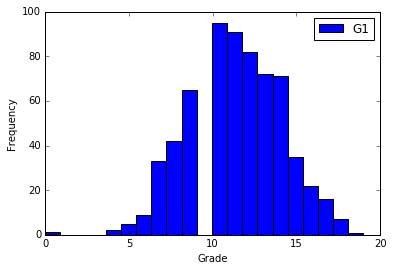

In [479]:
data['G1'].plot(kind = 'hist', bins = 21)
plt.xlabel('Grade')
plt.legend()
print('Самое частое значение: ',stats.mode(data['G1'])[0])
print('Средний балл: ', data['G1']. mean())
if data['G1'].max()==20:
    print('Есть студенты, получившие 20')
else:
    print('Нет студентов, ролучивших 20')
if data['G1'].min()==0:
    print('Есть студенты, получившие 0')
else:
    print('Нет студентов, ролучивших 0')

Итог: для целевой переменной средний балл выше, самое частое значение совпадает с перменной G2 и на 1 больше, чем у G1

In [480]:
stats.pearsonr(data['G3'], data['G2']) # корреляция G3 и G2

(0.91854800356035093, 5.6424014895849495e-263)

In [481]:
stats.pearsonr(data['G3'], data['G1']) # корреляция G3 и G1

(0.82638712478904719, 1.6175710073494019e-163)

Коэффициент корреляции близок к единице в обоих слуаях, можно говорить о наличии линейной зависимости.

# 3. Признаки, связанные со школой

In [482]:
print(stats.mode(data['reason']))

ModeResult(mode=array(['course'], dtype=object), count=array([285]))


school
GP    12.576832
MS    10.650442
Name: G3, dtype: float64

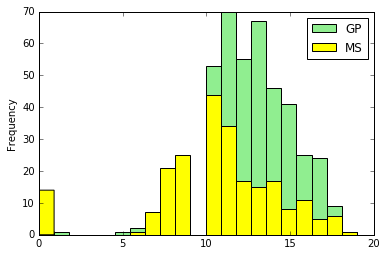

In [483]:
data[data['school']=='GP']['G3'].plot(kind = 'hist', bins = 21, color = 'lightgreen', label = 'GP')
data[data['school']=='MS']['G3'].plot(kind = 'hist', bins = 21, color = 'yellow', label = 'MS')
plt.legend()
data.groupby('school')['G3'].mean()

Студенты школы GP получают в среднем оценки выше, чем ученики школы MS

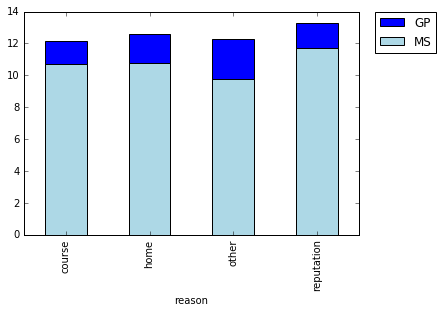

In [484]:
data[data['school']=='GP'].groupby('reason')['G3'].mean().plot(kind = 'bar', label = 'GP')
data[data['school']=='MS'].groupby('reason')['G3'].mean().plot(kind = 'bar', color = 'lightblue', label = 'MS')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Независимо от школы, ученики, выбравшие данную школу из-за репутации в среднем учатся лучше остальных.

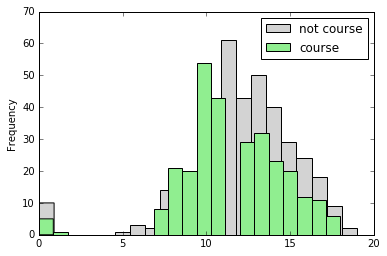

In [485]:
data[data['reason'] != 'course']['G3'].plot(kind = 'hist', bins = 21, color = 'lightgrey', label = 'not course')
data[data['reason']=='course']['G3'].plot(kind = 'hist', bins = 21, color = 'lightgreen', label = 'course')
plt.legend()

In [486]:
print(data[data['reason']=='course'].groupby('school')['G3'].mean(), '\n')
print(data[data['reason']!='course'].groupby('school')['G3'].mean())

school
GP    12.149701
MS    10.694915
Name: G3, dtype: float64 

school
GP    12.855469
MS    10.601852
Name: G3, dtype: float64


Для школы MS средний балл учеников, выбравших ее по самой частой причине, такой же, как у остальных, для школы GP он немного выше,чем у остальных.

#  4. Исследование других признаков

In [487]:
for i in range(len(v)):
    if v[i]==1:
        print('Признак: ', features[i])
        print('median =',np.median(data[features[i]]), '\n', stats.describe(data[features[i]]),  '\n')

Признак:  age
median = 17.0 
 DescribeResult(nobs=649, minmax=(15, 22), mean=16.7442218798151, variance=1.483859308718066, skewness=0.41583144316169546, kurtosis=0.06172808922743078) 

Признак:  failures
median = 0.0 
 DescribeResult(nobs=649, minmax=(0, 3), mean=0.22187981510015409, variance=0.35192794232342262, skewness=3.0855463722670793, kurtosis=9.739652089302947) 

Признак:  absences
median = 2.0 
 DescribeResult(nobs=649, minmax=(0, 32), mean=3.6594761171032357, variance=21.536642317715764, skewness=2.0160203779338577, kurtosis=5.727404492467972) 

Признак:  G1
median = 11.0 
 DescribeResult(nobs=649, minmax=(0, 19), mean=11.399075500770415, variance=7.5364806254636747, skewness=-0.0027672222073948627, kurtosis=0.02712580267716813) 

Признак:  G2
median = 11.0 
 DescribeResult(nobs=649, minmax=(0, 19), mean=11.570107858243452, variance=8.4892902661264245, skewness=-0.35944940869047437, kurtosis=1.6404536844223285) 

Признак:  G3
median = 12.0 
 DescribeResult(nobs=649, minmax=(0

In [488]:
print(data[data['absences']>10]['G3'].mean())
print(data[data['absences']<=10]['G3'].mean())

10.653061224489797
12.008333333333333


Студенты, имеющие больше 10 пропусков, учатся хуже остальных.

In [489]:
print(data[data['higher']=='yes']['G3'].mean())
print(data[data['higher']=='no']['G3'].mean())

12.275862068965518
8.797101449275363


Студенты, желающие получить высшее образование, учатся лучше остальных.

# 5. Самостоятельный анализ

Посмотрим на средние оценки, чтобы определить признаки, имеющие наибольшее влияние на целевой признак

In [490]:
print(data[data['paid']=='yes']['G3'].mean())
print(data[data['paid']=='no']['G3'].mean())

11.205128205128204
11.950819672131148


In [491]:
print(data[data['schoolsup']=='yes']['G3'].mean())
print(data[data['schoolsup']=='no']['G3'].mean())

11.279411764705882
11.97934595524957


In [492]:
print(data[data['romantic']=='yes']['G3'].mean())
print(data[data['romantic']=='no']['G3'].mean())

11.523012552301255
12.129268292682926


In [493]:
print(data[data['famsup']=='yes']['G3'].mean())
print(data[data['famsup']=='no']['G3'].mean())

12.057788944723619
11.665338645418327


In [494]:
print(data[data['Pstatus']=='T']['G3'].mean())
print(data[data['Pstatus']=='A']['G3'].mean())

11.905096660808436
11.9125


In [495]:
print(data[data['activities']=='yes']['G3'].mean())
print(data[data['activities']=='no']['G3'].mean())

12.104761904761904
11.718562874251496


In [496]:
print(data[data['goout']>2]['G3'].mean())
print(data[data['goout']<3]['G3'].mean())

11.787280701754385
12.186528497409327


In [497]:
print(data[data['famrel']>2]['G3'].mean())
print(data[data['famrel']<3]['G3'].mean())

12.003344481605351
10.764705882352942


In [498]:
print(data[data['Dalc']>2]['G3'].mean())
print(data[data['Dalc']<3]['G3'].mean())

10.454545454545455
12.101398601398602


In [499]:
print(data[data['Walc']>2]['G3'].mean())
print(data[data['Walc']<3]['G3'].mean())

11.25
12.32241813602015


In [500]:
print(data[data['health']>2]['G3'].mean())
print(data[data['health']<3]['G3'].mean())

11.752598752598752
12.345238095238095


In [501]:
print(data[data['Fedu']>2]['G3'].mean())
print(data[data['Fedu']<3]['G3'].mean())

12.64864864864865
11.412820512820513


In [502]:
print(data[data['Medu']>2]['G3'].mean())
print(data[data['Medu']<3]['G3'].mean())

12.560509554140127
11.292537313432836


Наиболее сильно влияющими факторами оказались образование родителей, отношения в семье и употребление алкоголя в будние дни.
Рассмотрим их подробнее

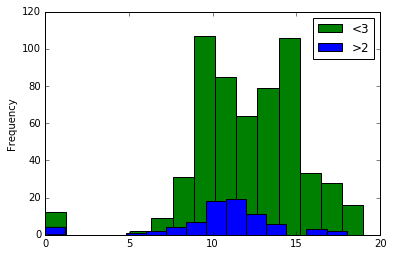

In [503]:
data[data['Dalc']<3]['G3'].plot(kind = 'hist',bins = 15, color = 'green', label = '<3')
data[data['Dalc']>2]['G3'].plot(kind = 'hist',bins = 15, label = '>2')
plt.legend()

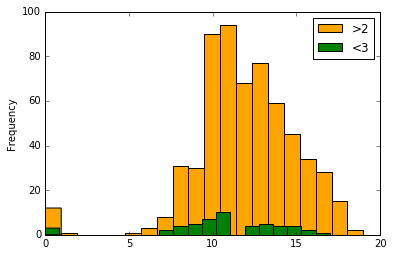

In [504]:
data[data['famrel']>2]['G3'].plot(kind = 'hist', bins = 20, color = 'orange', label = '>2')
data[data['famrel']<3]['G3'].plot(kind = 'hist', bins = 20, color = 'green', label = '<3')
plt.legend()

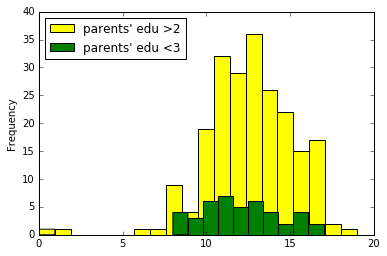

In [505]:
data1 = data[data['Fedu']>2]
data2 = data1[data1['Medu']>2]
data2['G3'].plot(kind = 'hist', bins = 20, color = 'yellow', label = "parents' edu >2")
data3 = data[data['Fedu']<3]
data4 = data1[data1['Medu']<3]
data4['G3'].plot(kind = 'hist', bins = 10, color = 'green', label = "parents' edu <3")
plt.legend(loc = 'best')